## 資料前處理

In [1]:
import keras

Using TensorFlow backend.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 使用Functional API、會分岔的神經網路

In [9]:
from keras.models import Model

In [10]:
from keras.layers import Input

#### 使用跟上星期做得最好的神經網路相似的層數與個數(激活函數relu、損失函數crossentropy、優化器SGD)

#### 但中間將2層隱藏層分岔，而不是全為線性堆疊

In [32]:
f_1 = Dense(100, activation='relu')
f_2 = Dense(500, activation='relu')
f_3 = Dense(250, activation='relu')
f_4 = Dense(10, activation='softmax')

In [33]:
x = Input(shape=(784, )) #？代表batch_size
x

<tf.Tensor 'input_4:0' shape=(?, 784) dtype=float32>

In [34]:
#架構神經網路
from keras.layers import concatenate,add

h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_2)

u=concatenate([h_2,h_3])
y=f_4(u)

In [35]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 100)          78500       input_4[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 500)          50500       dense_13[0][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 250)          125250      dense_14[0][0]                   
__________________________________________________________________________________________________
concatenat

In [36]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.0005), metrics=['acc'])

In [37]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [38]:
model_h = model.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.1, callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 40us/step - loss: 6.8546 - acc: 0.5479 - val_loss: 5.6476 - val_acc: 0.6318
Epoch 2/50
54000/54000 [==============================] - 2s 37us/step - loss: 5.5664 - acc: 0.6366 - val_loss: 5.4612 - val_acc: 0.6480
Epoch 3/50
54000/54000 [==============================] - 2s 40us/step - loss: 4.2683 - acc: 0.7135 - val_loss: 3.7497 - val_acc: 0.7480
Epoch 4/50
54000/54000 [==============================] - 2s 36us/step - loss: 2.8225 - acc: 0.7985 - val_loss: 0.7980 - val_acc: 0.9233
Epoch 5/50
54000/54000 [==============================] - 2s 36us/step - loss: 0.8359 - acc: 0.9190 - val_loss: 0.7242 - val_acc: 0.9312
Epoch 6/50
54000/54000 [==============================] - 2s 37us/step - loss: 0.6462 - acc: 0.9365 - val_loss: 0.5381 - val_acc: 0.9452
Epoch 7/50
54000/54000 [==============================] - 2s 36us/step - loss: 0.5311 - acc: 0.9462 - val_loss: 0.5002 - val_acc:

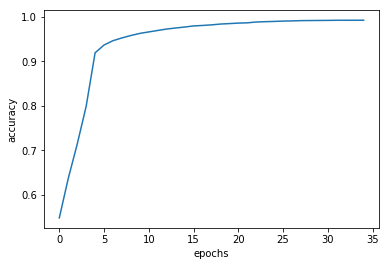

In [43]:
plt.plot(model_h.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

## training data的訓練成果

In [40]:
from sklearn import metrics 
from sklearn.metrics import classification_report

print("Train data：")
print(classification_report(y_train.argmax(1), model.predict(x_train).argmax(1)))
metrics.accuracy_score(y_train.argmax(1), model.predict(x_train).argmax(1))

Train data：
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      5923
          1       1.00      0.99      0.99      6742
          2       0.98      0.98      0.98      5958
          3       0.98      0.99      0.98      6131
          4       0.99      0.99      0.99      5842
          5       0.99      0.99      0.99      5421
          6       0.99      0.99      0.99      5918
          7       0.99      0.99      0.99      6265
          8       0.99      0.98      0.99      5851
          9       0.99      0.99      0.99      5949

avg / total       0.99      0.99      0.99     60000



0.9891333333333333

## 預測testing data的成果

In [41]:
print("Test data：")
print(classification_report(y_test.argmax(1), model.predict(x_test).argmax(1)))
metrics.accuracy_score(y_test.argmax(1), model.predict(x_test).argmax(1))

Test data：
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.94      0.95      1032
          3       0.92      0.95      0.94      1010
          4       0.94      0.96      0.95       982
          5       0.94      0.94      0.94       892
          6       0.96      0.96      0.96       958
          7       0.95      0.94      0.95      1028
          8       0.94      0.94      0.94       974
          9       0.94      0.93      0.94      1009

avg / total       0.95      0.95      0.95     10000



0.9509